In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/users/lauragallo/Desktop/DATA/Real estate valuation data set.csv')

In [3]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


### Data quality checks: Nulls and duplicates

In [35]:
pd.isnull(df).sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [34]:
df.duplicated().sum()

0

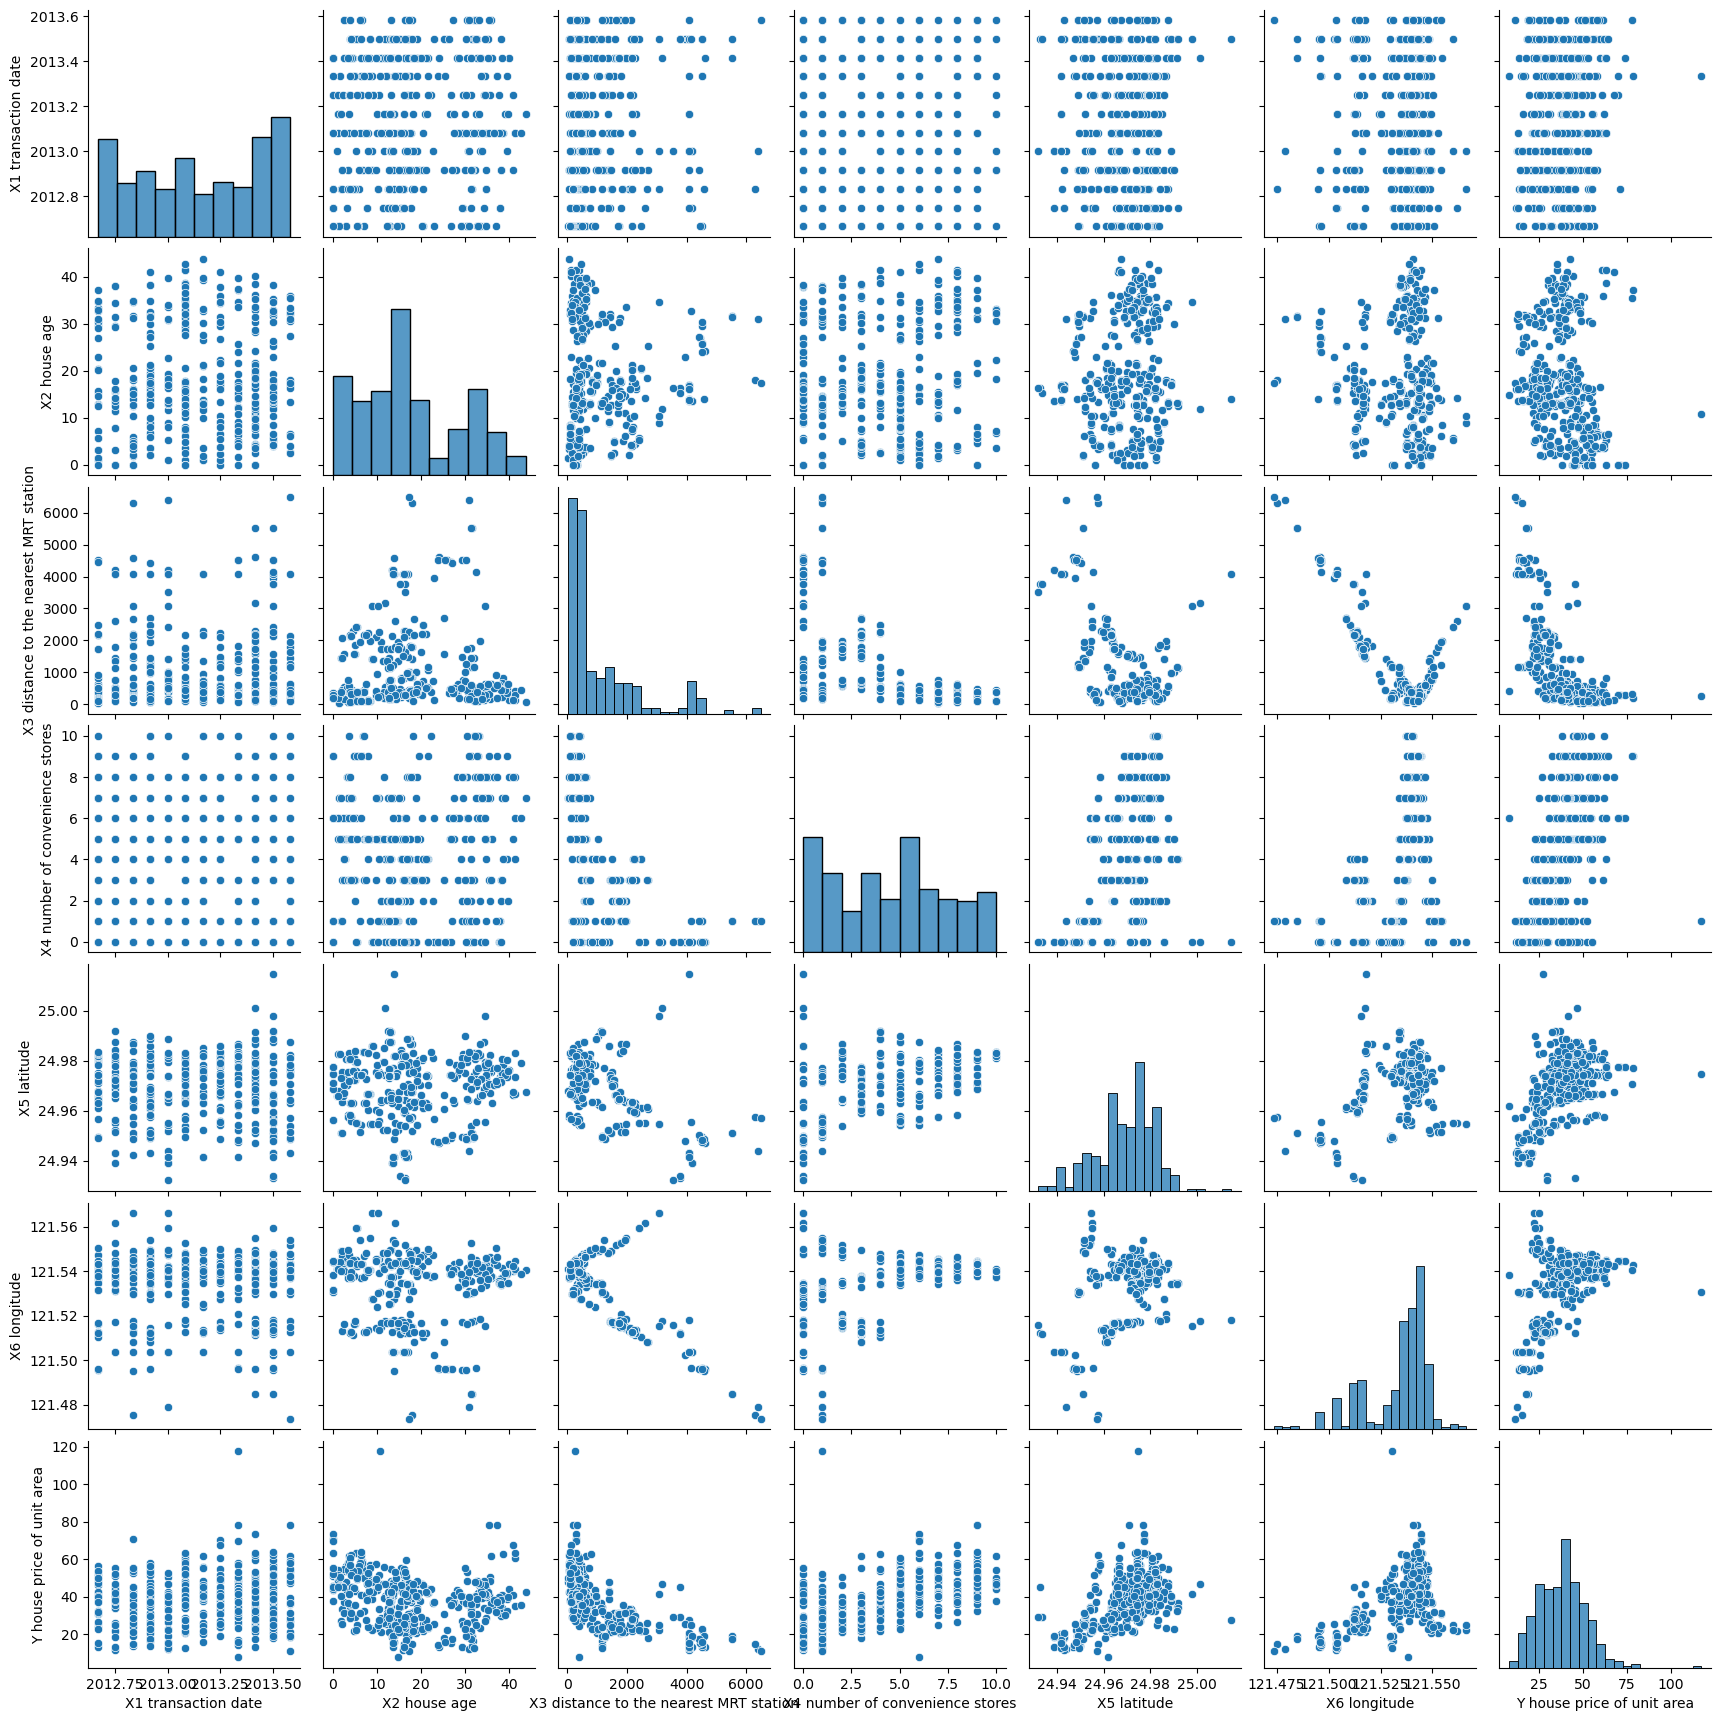

In [6]:
sns.pairplot(df)

[]

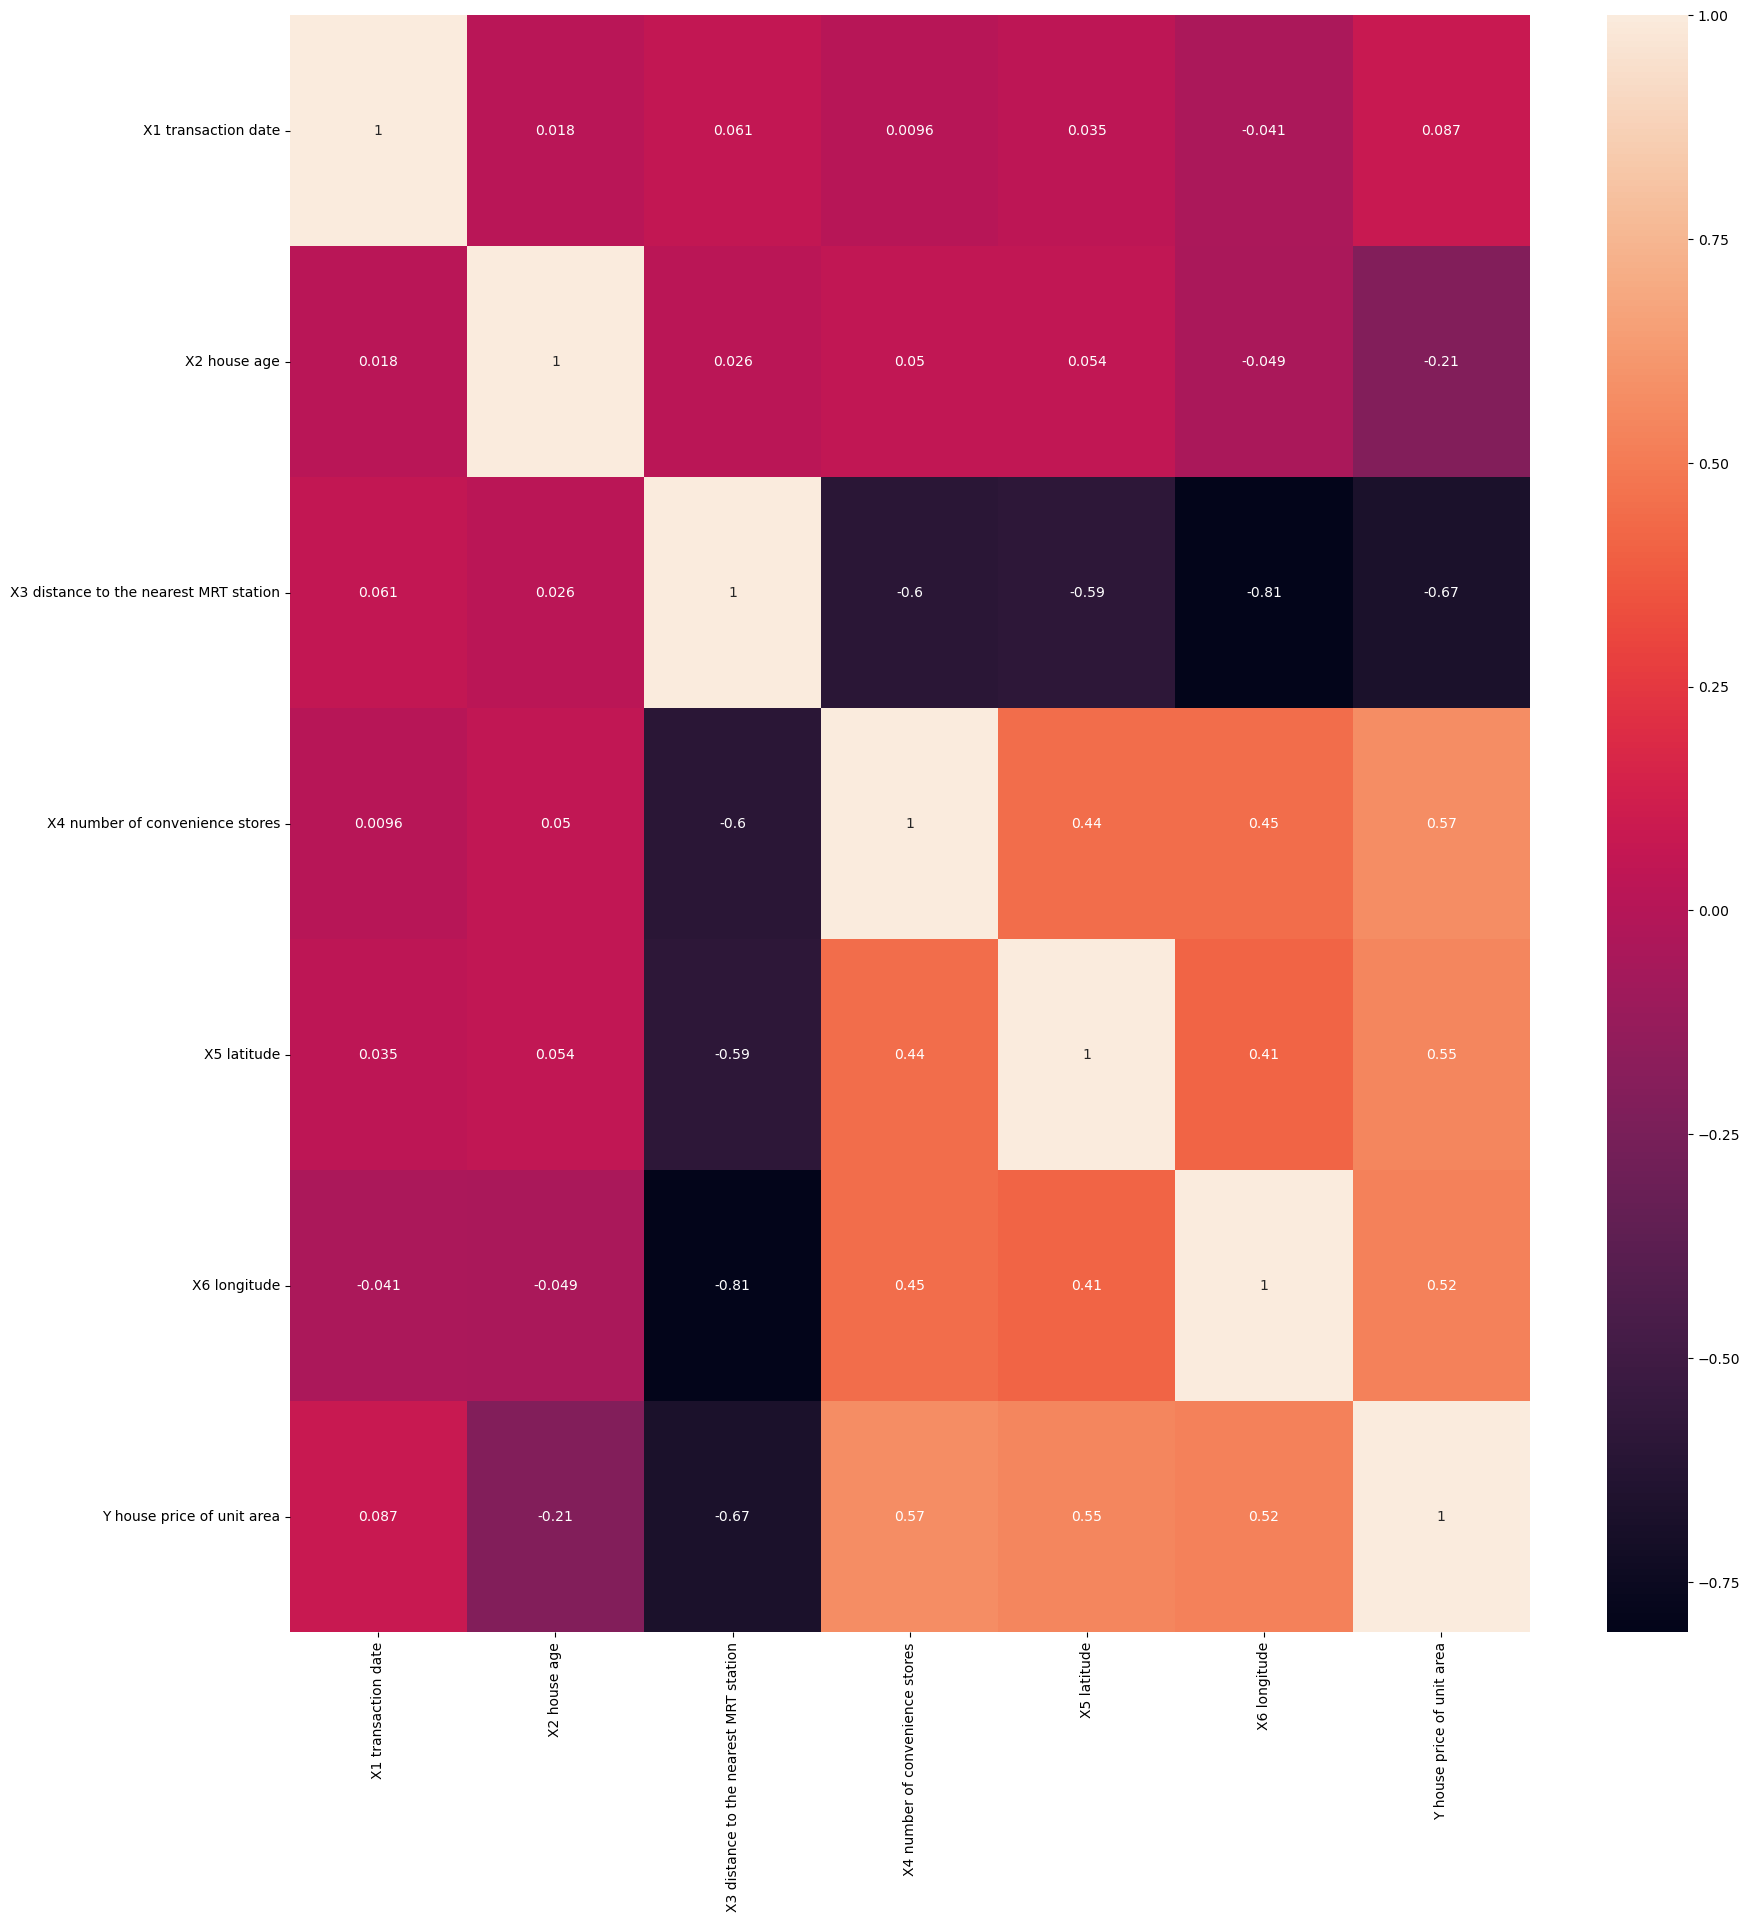

In [7]:
plt.figure(figsize=(20,21))
sns.heatmap(df.corr(),annot=True)# annot=true gives us the numbers on each cell
plt.plot()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

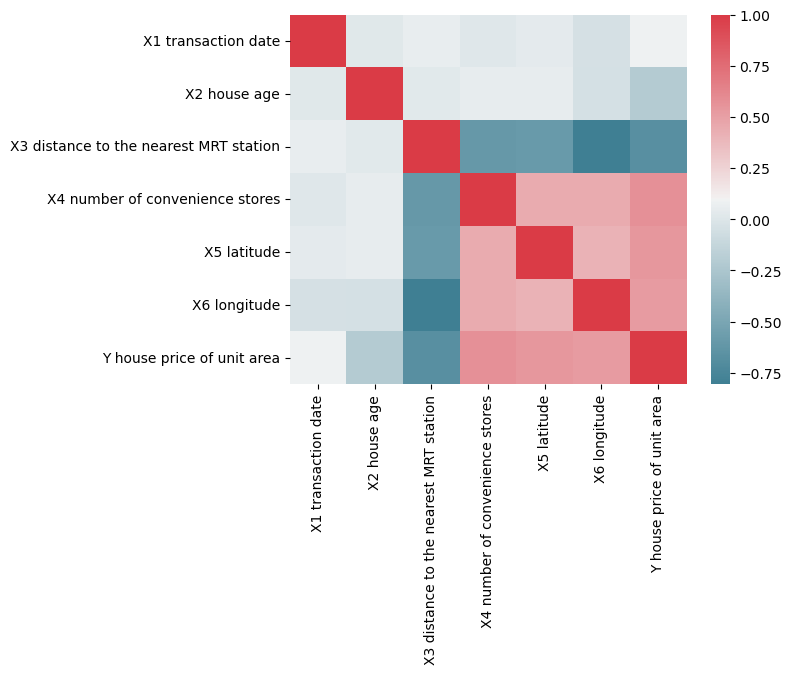

In [8]:
corr_df = df.corr(method='pearson')
display(corr_df)
___
sns.heatmap(corr_df, cmap=sns.diverging_palette(220,10, as_cmap=True),
           xticklabels=corr_df.columns.values,
           yticklabels=corr_df.columns.values)

### Calculating Coefficient of Determination for X6 longitude

In [9]:
feature = ['X6 longitude'] 

In [10]:
label=['Y house price of unit area']

In [11]:
x = df[feature]

In [12]:
y = df[label]

In [13]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [15]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [16]:
linreg.score(x_test, y_test)

0.23744644185759567

In [17]:
#Make predictions using the testing set
df_y_pred = linreg.predict(x_test)

#The coefficients
print('Coefficients: \n', linreg.coef_)
#The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(y_test, df_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_test, df_y_pred))

Coefficients: 
 [[460.76776315]]
Mean squared error: 169.37
Coefficient of determination: 0.24


### Calculating Coefficient of Determination for X5 latitude

In [18]:
feature = ['X5 latitude'] 

In [19]:
label=['Y house price of unit area']

In [20]:
x = df[feature]

In [21]:
y = df[label]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [23]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [24]:
linreg.score(x_test, y_test)

0.3538251612982727

In [25]:
#Make predictions using the testing set
df_y_pred = linreg.predict(x_test)

#The coefficients
print('Coefficients: \n', linreg.coef_)
#The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(y_test, df_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_test, df_y_pred))

Coefficients: 
 [[582.08494161]]
Mean squared error: 115.64
Coefficient of determination: 0.35


### Calculating Coefficient of Determination for X4 number of convenience stores

In [26]:
feature = ['X4 number of convenience stores'] 

In [27]:
label=['Y house price of unit area']

In [28]:
x = df[feature]

In [29]:
y = df[label]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [31]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [32]:
linreg.score(x_test, y_test)

0.26925322727121015

In [33]:
#Make predictions using the testing set
df_y_pred = linreg.predict(x_test)

#The coefficients
print('Coefficients: \n', linreg.coef_)
#The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(y_test, df_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(y_test, df_y_pred))

Coefficients: 
 [[2.72351213]]
Mean squared error: 126.89
Coefficient of determination: 0.27


### Latitude correlation with house price

[]

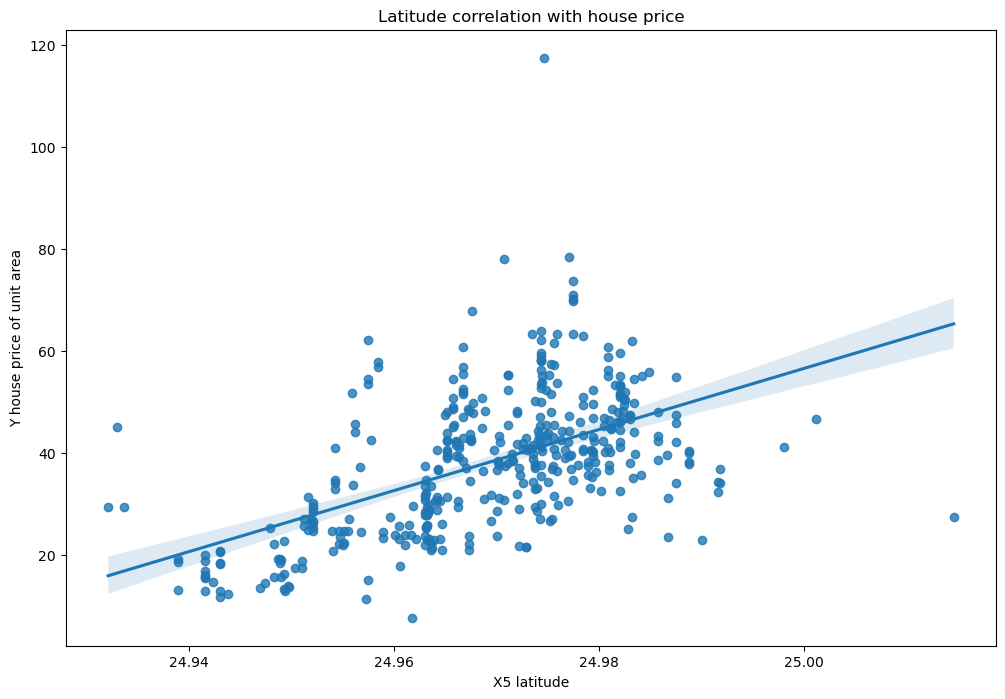

In [40]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, y='Y house price of unit area', x='X5 latitude').set(title='Latitude correlation with house price')
plt.plot()

### Longitude correlation with house price

[]

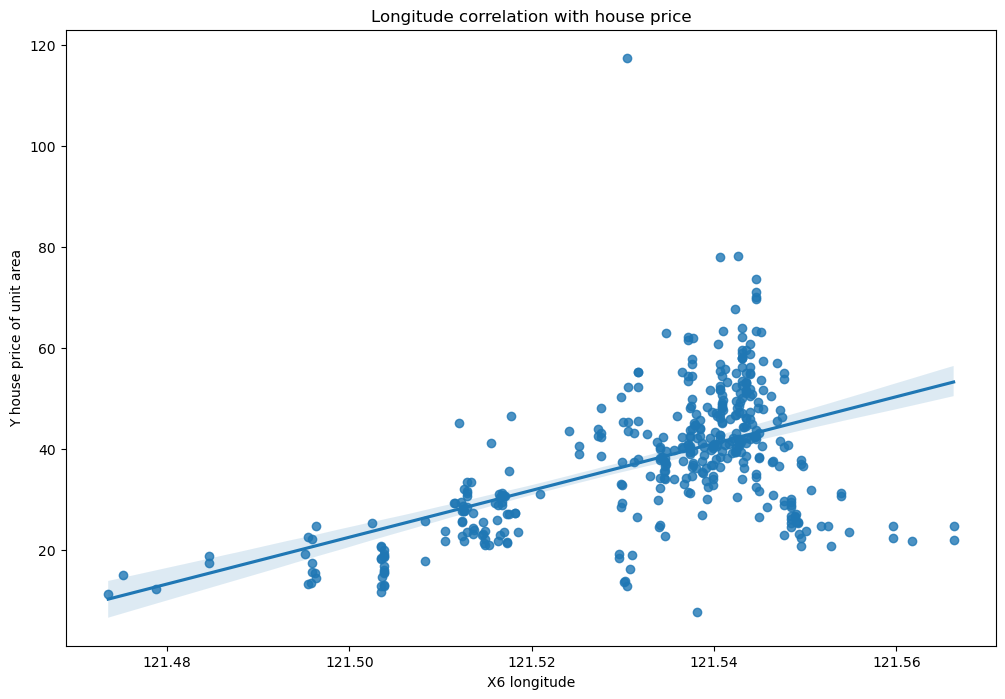

In [42]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, y='Y house price of unit area', x='X6 longitude').set(title='Longitude correlation with house price')
plt.plot()

### Number of convenient stores correlation with house price

[]

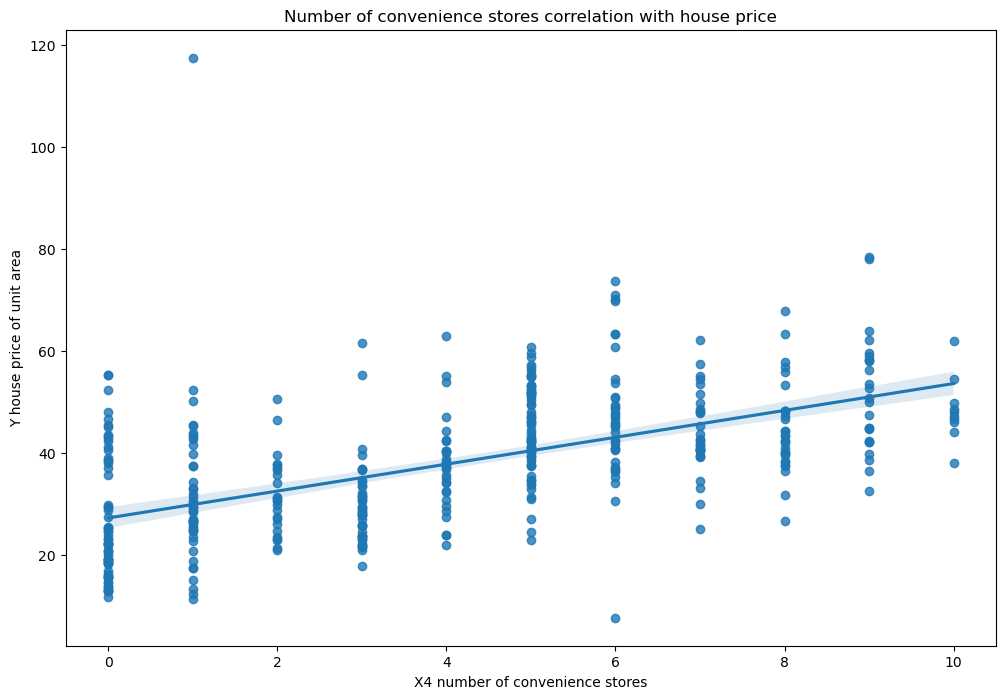

In [43]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, y='Y house price of unit area', x='X4 number of convenience stores').set(title='Number of convenience stores correlation with house price')
plt.plot()